# Problema diabetes Taller Machine Learning
## Ronald Morales, Karolina Ladino, Cristian Árevalo


### Información de la data
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
age sex bmi map tc ldl hdl tch ltg glu y
Samples total	442
Dimensionality	10
Features	real,     -.2 < x < .2
Targets	integer     25 - 346

The dataset in scikit-learn is standarized. It have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1)


### Ejercicio

Utilizando [diabetes.data](http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html):
- Realizar una regresión con respecto a BMI  
- Realizar una regresión con respecto a cada uno de los factores
- Realizar una regresión con respecto a  dos variables y a todas
- ¿Cuales serían las mejores variables de entrada para hacer la regresión y porque?
- ¿Qué puede concluir sobre la regresión?
- ¿Qué técnicas de visualización o muestra de resultados aplicaría?

Posibles factores para evaluar la eficiencia de la regresion:

- [coeficiente de determinación](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n).  en scikit usar [score](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)
- La media de la norma cuadratica del error.
- Aplicar [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html)


Posibles graficas a utilizar:
- entrada vs salida
- muestra vs salida
- histograma del error de estimación


[ejemplo usando información normalizada](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)



In [4]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

import pandas
import numpy as np
from sklearn import datasets, linear_model
from IPython.display import display, HTML

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()
#diabetes['feature_names'].append('Y')
#data=pandas.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'])
#descripcion=data.describe()
#print(descripcion)

data = pandas.read_csv('diabetes.data',sep='\t')
descripcion=data.describe()
display(HTML(data.describe().to_html()))


Automatically created module for IPython interactive environment


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Realizar una regresión con respecto a BMI 

Este es el modelo para BMI
Coeficiente  [10.65228664]
Intercepto -128.49952726832086
Error media cuadrarada 4129.23
r^2 mejor estimando:  0.29
r^2 k-fold=5:  [0.28593451 0.2031138  0.32850627 0.16546242 0.53293908]
r^2 mejor estimando: 0.53


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


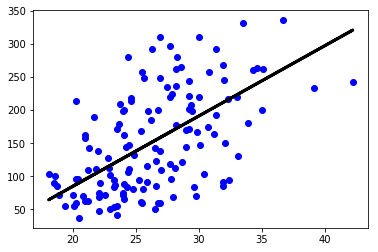

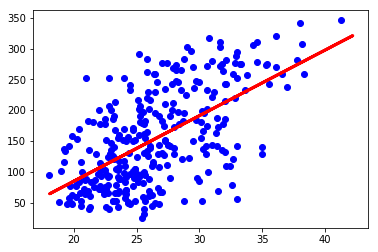

0.532939084787322

In [22]:
'''
BMI
'''
%matplotlib inline
import pickle #for save the model
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.cross_validation import train_test_split
# de acuerdo a la version scikit train_test_split puede ser
from sklearn.model_selection import train_test_split, cross_val_score

#Se definen las variables x y y
diabetes_X = data.as_matrix(['BMI'])
diabetes_Y =data['Y']

def pro(dtX, dtY, testSize=0.30, grafica=True):
    #Datos prueba/entrenamiento
    x_train, x_test, y_train, y_test = train_test_split(dtX, dtY, test_size=testSize, random_state=5000)
    
    #Modelo de regresión
    mregre = linear_model.LinearRegression()
    
    #Entrenamiento
    mregre.fit(x_train, y_train)
    
    #Evaluamos resultados
    coef = mregre.coef_
    inter = mregre.intercept_
    print ('Coeficiente ',coef)
    print ('Intercepto',inter)
    
    y_pred = mregre.predict(x_test)
    
    print("Error media cuadrarada %.2f" % mean_squared_error(y_test, y_pred))
    print("r^2 mejor estimando:  %.2f" % r2_score(y_test,y_pred))
    
    scoring =['neg_mean_squared_error', 'r2']
    scores= cross_val_score (mregre, x_train, y_train, scoring=scoring[1],cv=5)
    print ("r^2 k-fold=5: ", scores)
    maxr2 = scores.max()
    print ("r^2 mejor estimando: %.2f" %maxr2)
    
    if grafica==True:
        plt.scatter(x_test, y_test, color='blue')
        plt.plot(x_test, y_pred, color='black', linewidth=3)
        plt.show()
        
        plt.scatter(x_train, y_train, color='blue')
        plt.plot(x_test, y_pred, color='red', linewidth=3)
        plt.show()
        
    return maxr2

print('Este es el modelo para BMI')
pro(diabetes_X, diabetes_Y, 0.30)

### Realizar una regresión con respecto a cada uno de los factores

Featuree:  AGE
Coeficiente  [0.98109261]
Intercepto 104.98829775472112
Error media cuadrarada 5552.49
r^2 mejor estimando:  0.05
r^2 k-fold=5:  [ 0.03208735 -0.25573931  0.02145776 -0.15619008  0.00885648]
r^2 mejor estimando: 0.03


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


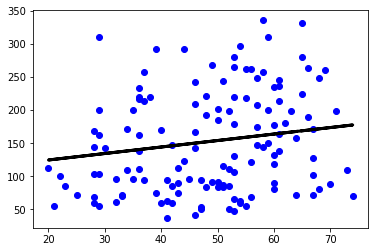

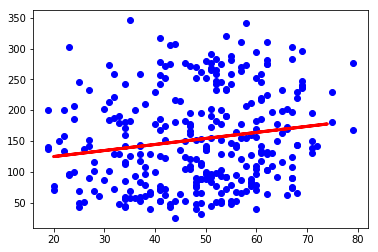

Featuree:  SEX
Coeficiente  [2.34635328]
Intercepto 149.19699931995922
Error media cuadrarada 5832.58
r^2 mejor estimando:  0.00
r^2 k-fold=5:  [-0.05134238 -0.29034831 -0.04835419 -0.18082305 -0.02045795]
r^2 mejor estimando: -0.02


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


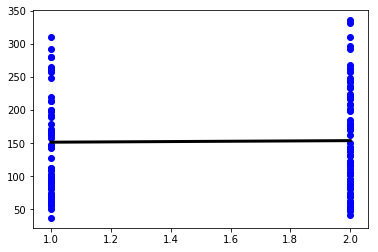

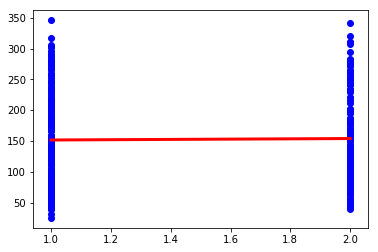

Featuree:  BMI
Coeficiente  [10.65228664]
Intercepto -128.49952726832086
Error media cuadrarada 4129.23
r^2 mejor estimando:  0.29
r^2 k-fold=5:  [0.28593451 0.2031138  0.32850627 0.16546242 0.53293908]
r^2 mejor estimando: 0.53


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


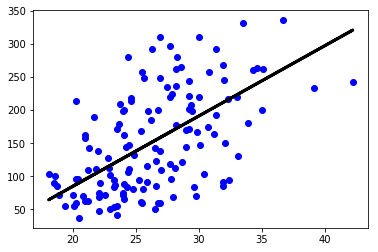

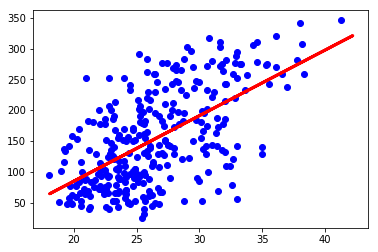

Featuree:  BP
Coeficiente  [2.3029269]
Intercepto -65.79455692819477
Error media cuadrarada 4416.09
r^2 mejor estimando:  0.24
r^2 k-fold=5:  [ 0.28492121 -0.14132982  0.27184647 -0.12397285  0.11881206]
r^2 mejor estimando: 0.28


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


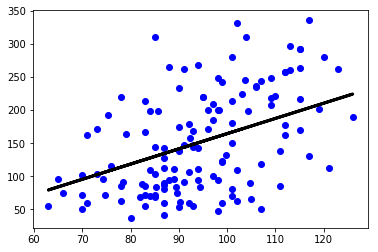

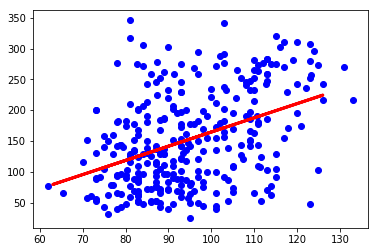

Featuree:  S1
Coeficiente  [0.44959343]
Intercepto 67.59416413853548
Error media cuadrarada 5518.18
r^2 mejor estimando:  0.06
r^2 k-fold=5:  [-0.02133543 -0.27299872  0.05011496 -0.08669662  0.01932497]
r^2 mejor estimando: 0.05


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


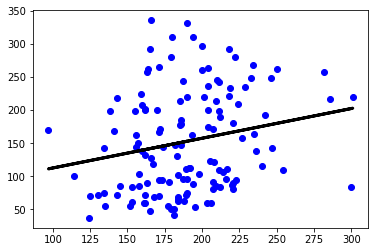

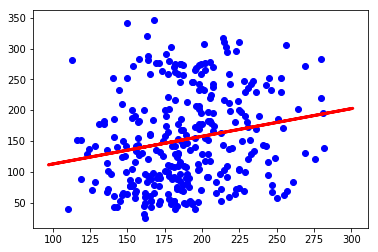

Featuree:  S2
Coeficiente  [0.42710111]
Intercepto 103.6338586526535
Error media cuadrarada 5641.47
r^2 mejor estimando:  0.04
r^2 k-fold=5:  [-0.05987844 -0.29635733  0.03717695 -0.11005868  0.02828263]
r^2 mejor estimando: 0.04


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


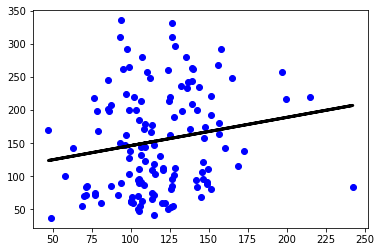

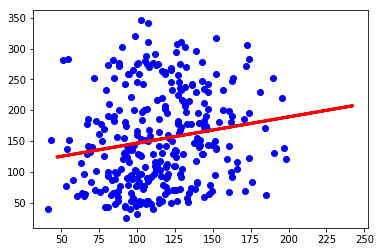

Featuree:  S3
Coeficiente  [-2.30666683]
Intercepto 268.67081740555
Error media cuadrarada 5006.88
r^2 mejor estimando:  0.14
r^2 k-fold=5:  [ 0.18312675 -0.05202636 -0.03510408 -0.02218269  0.25004074]
r^2 mejor estimando: 0.25


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


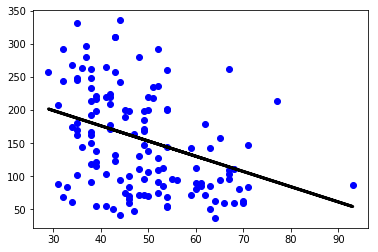

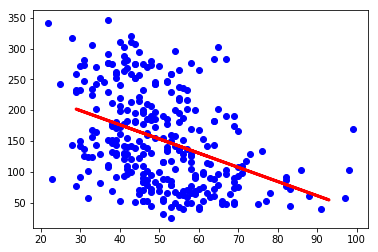

Featuree:  S4
Coeficiente  [25.93279781]
Intercepto 48.04925237453574
Error media cuadrarada 4748.81
r^2 mejor estimando:  0.19
r^2 k-fold=5:  [ 0.1249634  -0.0271601   0.09162777  0.04819221  0.28341575]
r^2 mejor estimando: 0.28


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


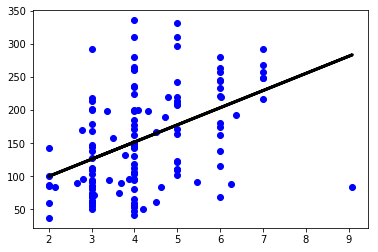

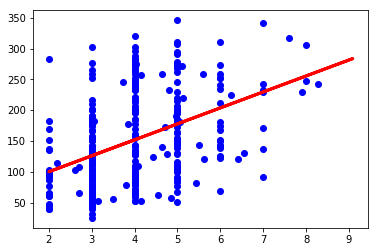

Featuree:  S5
Coeficiente  [83.53723023]
Intercepto -236.0833990586879
Error media cuadrarada 3909.98
r^2 mejor estimando:  0.33
r^2 k-fold=5:  [0.37609704 0.12172961 0.15955406 0.2715187  0.27955018]
r^2 mejor estimando: 0.38


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


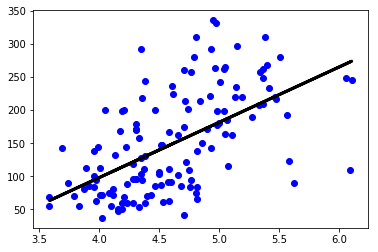

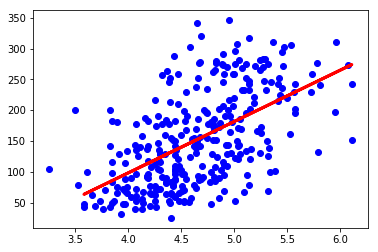

Featuree:  S6
Coeficiente  [2.16812486]
Intercepto -44.2882821234752
Error media cuadrarada 4432.44
r^2 mejor estimando:  0.24
r^2 k-fold=5:  [ 0.08575452 -0.19257778  0.01603986 -0.03242514  0.14558761]
r^2 mejor estimando: 0.15


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


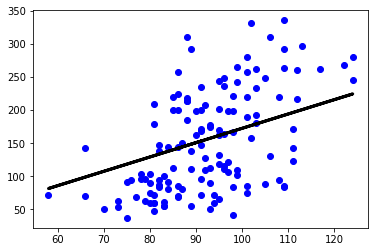

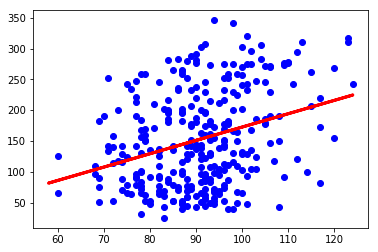

In [23]:
#plt.figure(figsize=(20,10))
d = {}
for factor in data.keys():
    if factor != "Y":
        diabetes_X = data.as_matrix([factor])
        diabetes_Y = data['Y']
        print('Featuree: ',factor)
        res = pro(diabetes_X, diabetes_Y)
        d[factor] = res


###  Realizar una regresión con respecto a  dos variables y a todas 

dos variables
Coeficiente  [0.83456965 9.90521318]
Intercepto -184.56532626249063
Error media cuadrarada 3818.63
r^2 mejor estimando:  0.35
r^2 k-fold=5:  [0.28321432 0.21387755 0.34762011 0.18404985 0.55262632]
r^2 mejor estimando: 0.55


todas las variables
Coeficiente  [ -0.06917783 -20.29616864   6.14691638   0.96204357  -0.71303492
   0.50613796  -0.09162028   2.83108108  59.15528292   0.16769582]
Intercepto -288.7283656425809
Error media cuadrarada 2703.54
r^2 mejor estimando:  0.54
r^2 k-fold=5:  [0.4431796  0.37603729 0.43727752 0.34447832 0.5495952 ]
r^2 mejor estimando: 0.55


variables representativas
Coeficiente  [ -0.12331945 -23.58545182   5.98010062   1.021246    -1.23832849
  -2.81205831  45.29130553]
Intercepto -199.01148286265064
Error media cuadrarada 2847.40
r^2 mejor estimando:  0.49
r^2 k-fold=5:  [0.49551722 0.49784133 0.35360732 0.44608193 0.51450153]
r^2 mejor estimando: 0.51


gráfico de R2 x atributo


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<BarContainer object of 10 artists>

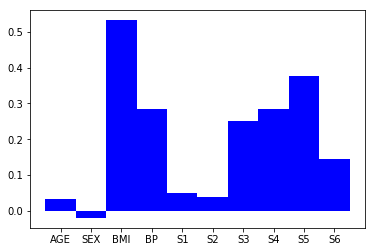

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print ('dos variables')
diabetes_X = data.as_matrix(['S6','BMI'])
diabetes_Y = data['Y']
pro(diabetes_X ,diabetes_Y, 0.30, False)
print ('\n')
                             
print ('todas las variables')
diabetes_X = data.as_matrix(['AGE', 'SEX','BMI' ,'BP' ,'S1' ,'S2' ,'S3' ,'S4' ,'S5' ,'S6' ,])
pro(diabetes_X ,diabetes_Y, 0.30, False)                           
print ('\n')
                             
print ('variables representativas')
diabetes_X = data.as_matrix(['AGE', 'SEX','BMI' ,'BP' ,'S3' ,'S4' ,'S5' ])
pro(diabetes_X ,diabetes_Y, 0.20, False)     
                             
print ('\n')
print ('gráfico de R2 x atributo')
width = 1.0
plt.bar(d.keys(), d.values(), width, color='b')



### Presente sus conclusiones del ejercicio

- ¿Cuales serían las mejores variables de entrada para hacer la regresión y porque?

- ¿Qué puede concluir sobre la regresión?

- ¿Qué técnicas de visualización o muestra de resultados aplicaría?